# Tempest Extremes applied to NextGEMS data

This is trying to work with the intake catalog and using the regridder. Open the catalog and check that everything works correctly. Import functions we created ad-hoc for TCs


In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, '../') # Hack to import from parent directory, to be removed
from aqua.reader import Reader, catalogue
catalogue();

SystemExit: Cannot find the basic configuration file!

/work/bb1153/b382216/mambaforge/envs/TCs/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:

from functions_TCs import detect_nodes_zoomin, stitch_nodes_zoomin
from plotting_TCs import multi_plot

In [3]:
# path to directories

# put the dirs in a yaml file
dirs ={ 'regdir':'/home/b/b382216/scratch/regrid_intake',
        'tmpdir':'/home/b/b382216/scratch/tmpdir_intake',
        'fulldir':'/home/b/b382216/scratch/fullres'}

# dimension (in degrees) of the box to be saved
boxdim=10

# resolution for high and low res data
lowgrid='r100'
highgrid='r100'

# possibly put this in the fixer
# variables to be stored
#varlist = ['psl', 'uas', 'vas', 'pr']
varlist = ['msl', '10u', '10v', 'tp']

# dicitonary with the original filenames
#original_dictionary = {'psl': 'msl', 'uas': '10u', 'vas': '10v', 'pr': 'tp'}
original_dictionary = {'msl': 'msl', '10u': '10u', '10v': '10v', 'tp': 'tprate'}

# experiment details
model='IFS'
experiment_name = 'tco2559-ng5'

#initial year and month
init_year=2020
init_month=9
init_day=29

#final year and month
end_year=2020
end_month=12
end_day=30

# support variables
hour_freq = 6 #hourly frequency to retrieve data
retrieve_frequency = str(hour_freq)+'h' 

# keyword argument or define a class 
# dicitonary with the original filenames
retrieve_dictionary = {'init_year': init_year, 'init_month': init_month, "init_day": init_day, 
                       'end_year': end_year, 'end_month': end_month, "end_day": end_day,
                       'frequency': retrieve_frequency,
                       'model': model, 'exp': experiment_name}

Now we apply the nodes detection from TempestExtremes in order to filter the high resolution data with the regions in the surroundings of the tropical cyclones centres

In [4]:
detect_nodes_zoomin(retrieve_dictionary=retrieve_dictionary, dirs=dirs, varlist=varlist, \
                    original_dictionary=original_dictionary, lowgrid=lowgrid, highgrid=highgrid, boxdim=boxdim, write_fullres=True)

20200929T00


2023-03-30 12:30:17 WARNING: No fixes defined for model IFS, experiment tco2559-ng5, source ICMU_atm3d


20200929T06


2023-03-30 12:30:43 WARNING: No fixes defined for model IFS, experiment tco2559-ng5, source ICMU_atm3d


20200929T12


2023-03-30 12:31:09 WARNING: No fixes defined for model IFS, experiment tco2559-ng5, source ICMU_atm3d


20200929T18


2023-03-30 12:31:34 WARNING: No fixes defined for model IFS, experiment tco2559-ng5, source ICMU_atm3d


20200930T00


2023-03-30 12:32:00 WARNING: No fixes defined for model IFS, experiment tco2559-ng5, source ICMU_atm3d


KeyboardInterrupt: 

Now we additinally filter the high-res data applying the StitchNodes command from TempestExtremes to remove spurious nodes (e.g. imposing a minimum lenght of the tracks). High-res variables tracks are then saved in a NETCDF file in time blocks of prescribed length.

In [ ]:
# n_days_ext = number of days in which each time block is extended at the beginning and at the end
# write_fullres = whether or not store fullres netcdf files
# n_days_freq = number of days to save in the NETCDF file


stitch_nodes_zoomin(retrieve_dictionary=retrieve_dictionary, dirs=dirs, varlist=varlist, \
                    boxdim=boxdim, n_days_ext = 5, n_days_freq = 30, write_fullres=True)

Arguments:
  --in <string> ["full_nodes.txt"] 
  --in_list <string> [""] 
  --in_connect <string> [""] 
  --out <string> ["/home/b/b382216/scratch/tmpdir_intake/tempest_track_20200929-20201028.txt"] 
  --in_fmt <string> ["lon,lat,slp,wind"] 
  --range <double> [8.000000] (degrees)
  --mintime <string> ["54h"] 
  --time_begin <string> [""] 
  --time_end <string> [""] 
  --min_endpoint_dist <double> [0.000000] (degrees)
  --min_path_dist <double> [0.000000] (degrees)
  --maxgap <string> ["6h"] 
  --threshold <string> ["wind,>=,10.0,10;lat,<=,50.0,10;lat,>=,-50.0,10"] [col,op,value,count;...]
  --caltype <string> ["standard"] (none|standard|noleap|360_day)
  --allow_repeated_times <bool> [false] 
  --out_file_format <string> ["gfdl"] (gfdl|csv|csvnohead)
------------------------------------------------------------
Parsing thresholds
..wind greater than or equal to 10.000000 at least 10 time(s)
..lat less than or equal to 50.000000 at least 10 time(s)
..lat greater than or equal to -50.000

Plot some time steps of each variable's track

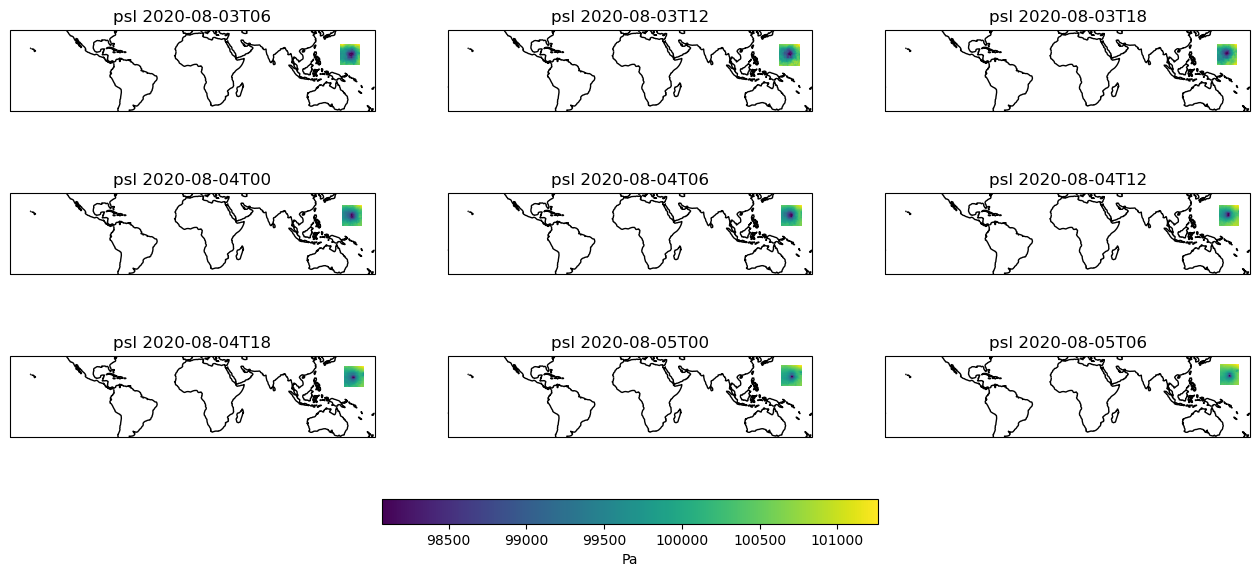

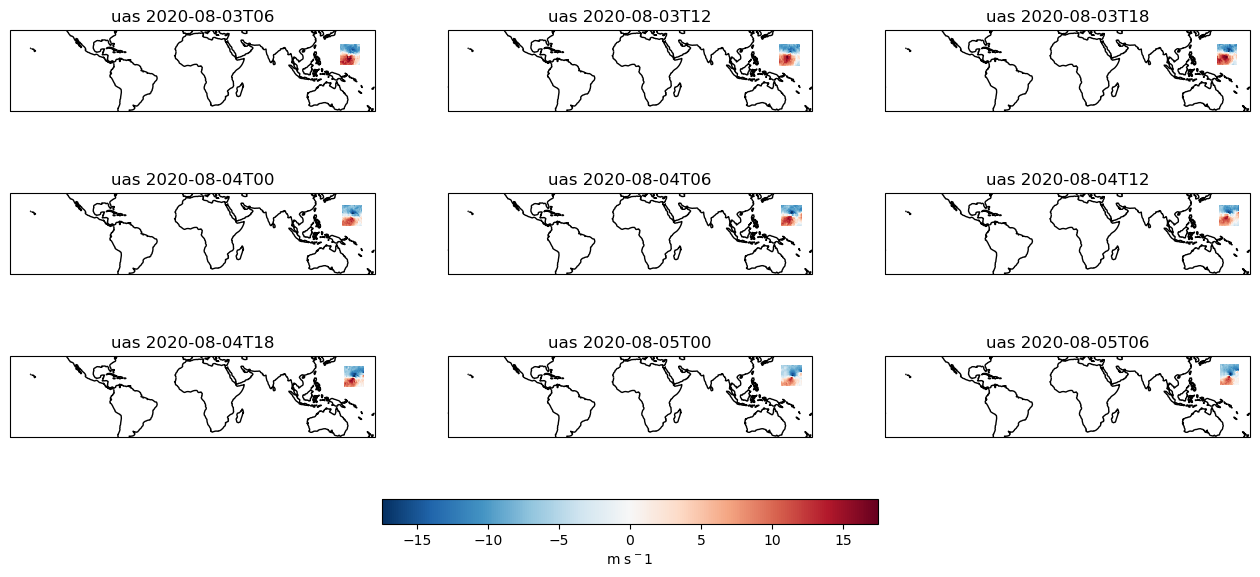

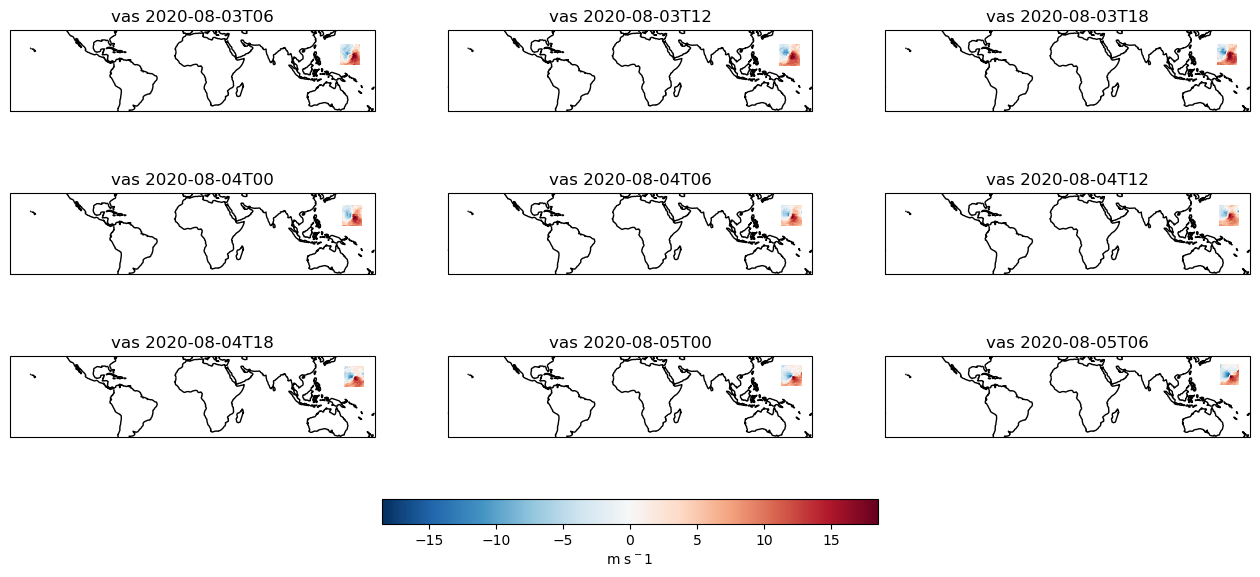

In [ ]:
# variables to be plotted
varlist_plot = ['psl', 'uas', 'vas']
for var in varlist_plot : 

    tracks_nc_file = os.path.join(dirs['tmpdir'], f'tempest_tracks_{var}_20200720-20200818.nc')
    tracks_nc_file = xr.open_dataset(tracks_nc_file)[var]
    multi_plot(tracks_nc_file)

Plot the wind module at 10 m

{}


TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

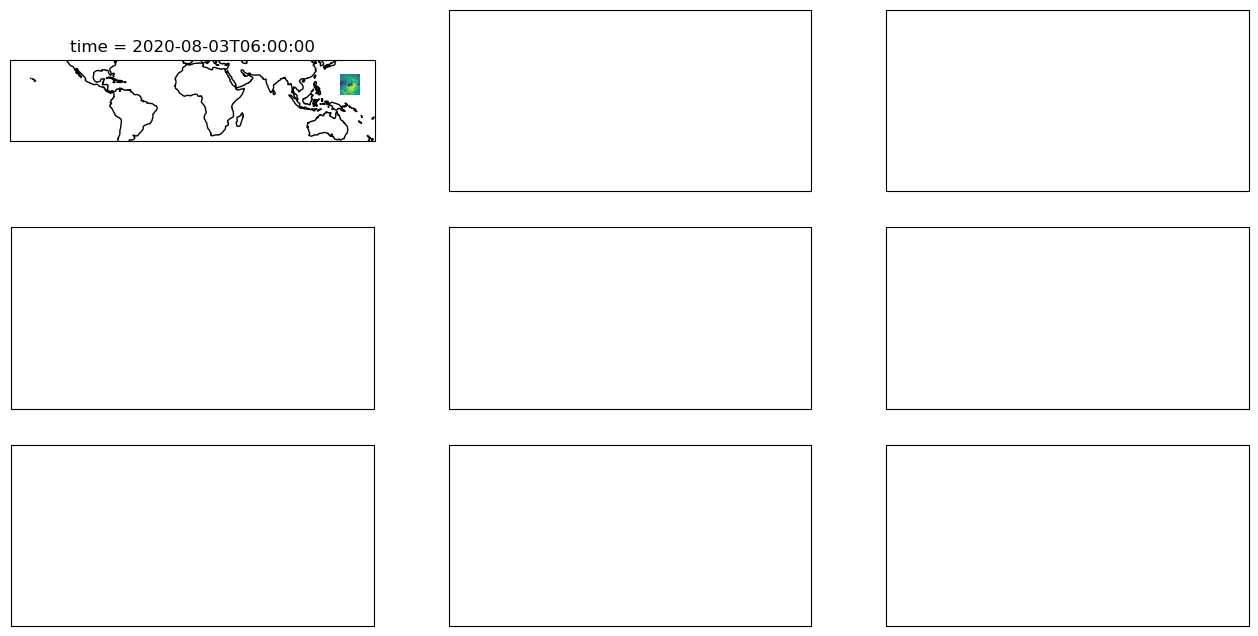

In [ ]:
# u 10m
tracks_u10 = os.path.join(dirs['tmpdir'], f'tempest_tracks_uas_20200720-20200818.nc')
tracks_u10_file = xr.open_dataset(tracks_u10)['uas']

# v 10m
tracks_v10 = os.path.join(dirs['tmpdir'], f'tempest_tracks_vas_20200720-20200818.nc')
tracks_v10_file = xr.open_dataset(tracks_v10)['vas']

tracks_nc_file = (tracks_u10_file**2 + tracks_v10_file**2)**0.5
print(tracks_nc_file.attrs)
multi_plot(tracks_nc_file)

Plot the tracks of each time block

Getting trajectories from TempestExtremes file...
Running getTrajectories on '/home/b/b382216/scratch/tmpdir_intake/tempest_track_20200720-20200818.txt' with unstruc set to '0'
nVars set to 10 and headerDelimStr set to 'start'
Found 10 columns
Found 3 trajectories
... done reading data


/work/bb1153/b382216/mambaforge/envs/TCs/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/work/bb1153/b382216/mambaforge/envs/TCs/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


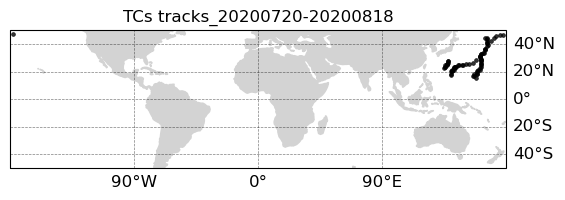

In [ ]:
plotdir = "/home/b/b382216/work/AQUA/diagnostics/tempest/plot/"
n_days_freq = 30
# loop on each time stamp in dates
for block in pd.date_range(start=f'{retrieve_dictionary["init_year"]}-{retrieve_dictionary["init_month"]}-{retrieve_dictionary["init_day"]}', 
                               end=f'{retrieve_dictionary["end_year"]}-{retrieve_dictionary["end_month"]}', freq=str(n_days_freq)+'D'):
    dates = pd.date_range(start=block, periods=n_days_freq, freq='D')
    track_file = os.path.join(dirs['tmpdir'], f'tempest_track_{block.strftime("%Y%m%d")}-{dates[-1].strftime("%Y%m%d")}.txt')
    plot_trajectories(track_file, plotdir, block, dates)